In [ ]:
from ml_fertilizers.utils import load_data



In [6]:
train, _ = load_data()
train = train.set_index('id')
train

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...
749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26


In [7]:
train.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [11]:
train.nunique()

Temparature        14
Humidity           23
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           39
Potassium          20
Phosphorous        43
Fertilizer Name     7
dtype: int64

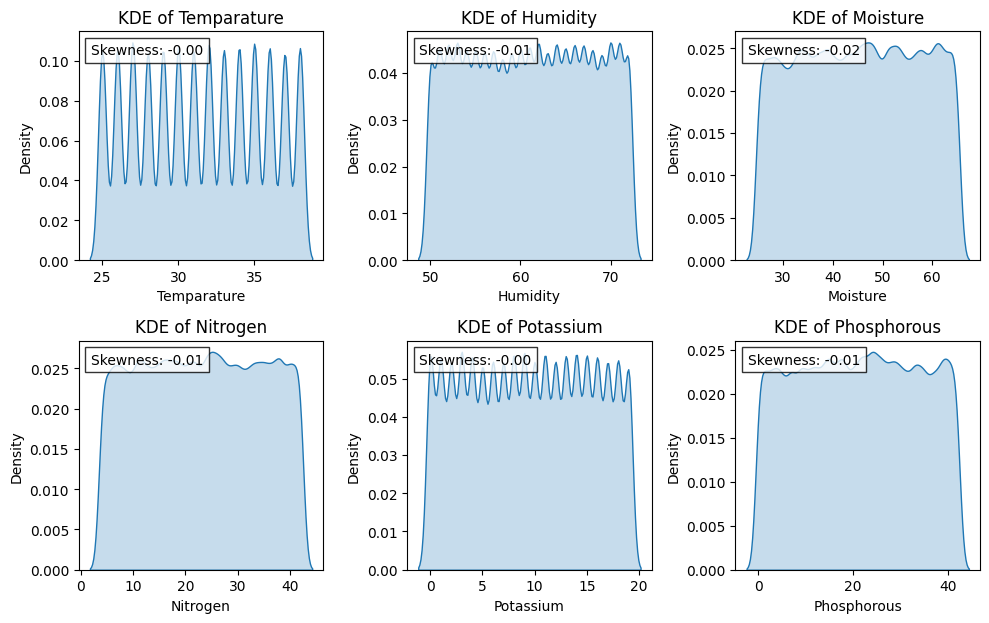

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import skew  # For skewness calculation
import seaborn as sns

numerical_df = train.select_dtypes(include=['float64', 'int64'])
# Set up subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_df.columns) // n_cols) + 1

# Create a figure with subplots
plt.figure(figsize=(10, 3 * n_rows))  # Adjust size as needed

# Loop through numerical columns and plot KDE + skewness
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=numerical_df, x=column, fill=True)
    
    # Calculate skewness
    skewness = skew(numerical_df[column].dropna())  # Handle NaN if needed
    skew_text = f'Skewness: {skewness:.2f}'
    
    # Add skewness as text in the plot
    plt.text(0.05, 0.9, skew_text, transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(f'KDE of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

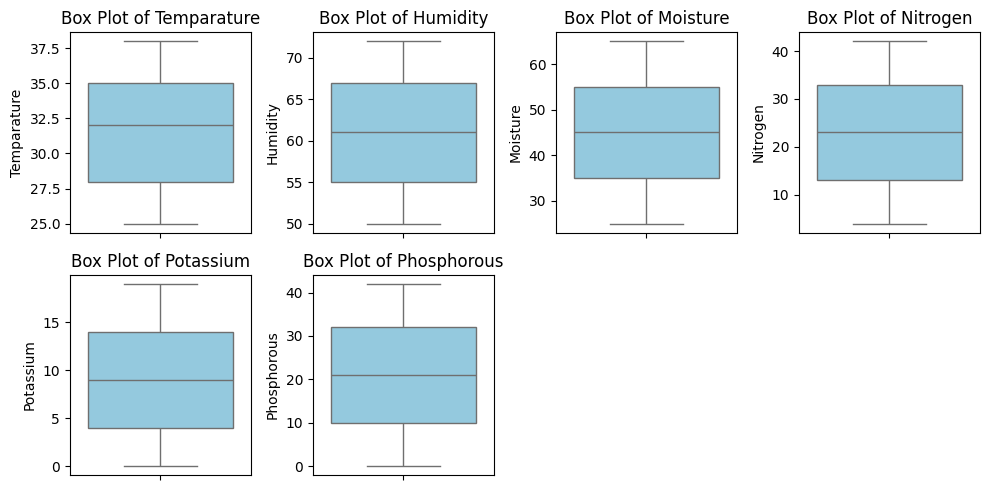

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numerical_df.columns, 1):
    plt.subplot(2, 4, i)  # Adjust subplot grid as needed
    sns.boxplot(data=train, y=feature, color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()
plt.show()

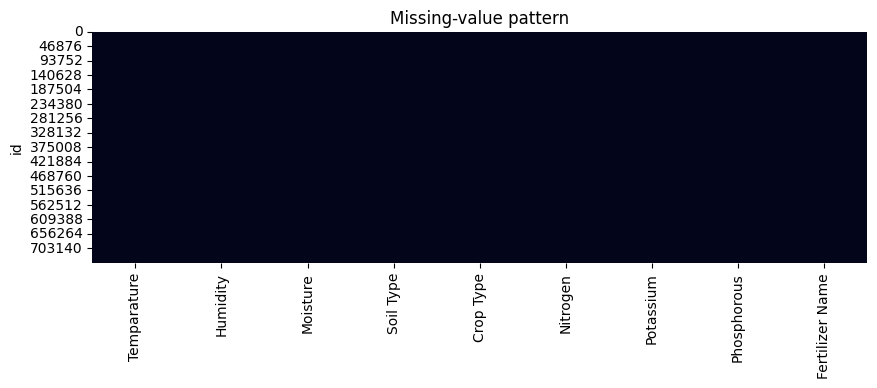

In [21]:
plt.figure(figsize=(10,3))
sns.heatmap(train.isna(), cbar=False)
plt.title("Missing‐value pattern"); plt.show()

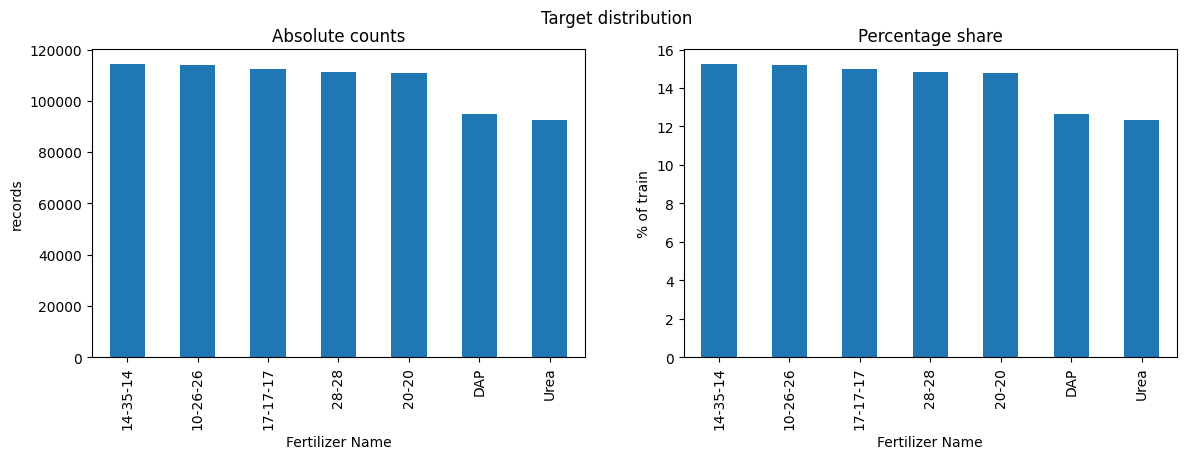

In [22]:
target_col = "Fertilizer Name"
vc = train[target_col].value_counts().sort_values(ascending=False)
vc_pct = vc / len(train) * 100

fig, ax = plt.subplots(1,2,figsize=(14,4))
vc.plot.bar(ax=ax[0])
ax[0].set_title("Absolute counts"); ax[0].set_ylabel("records")

vc_pct.plot.bar(ax=ax[1])
ax[1].set_title("Percentage share"); ax[1].set_ylabel("% of train")
plt.suptitle("Target distribution"); plt.show()

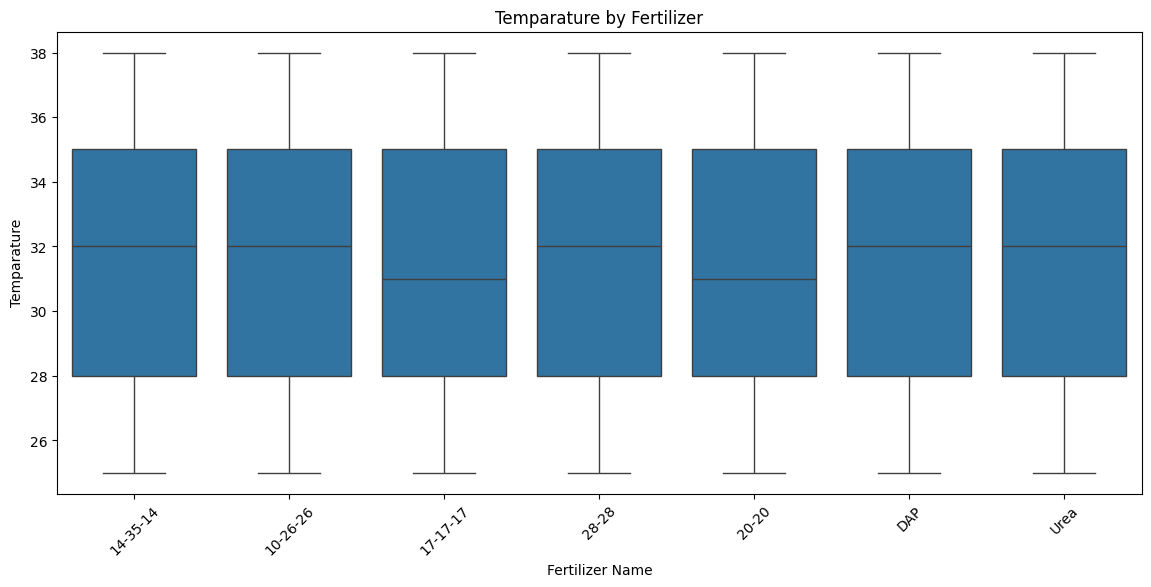

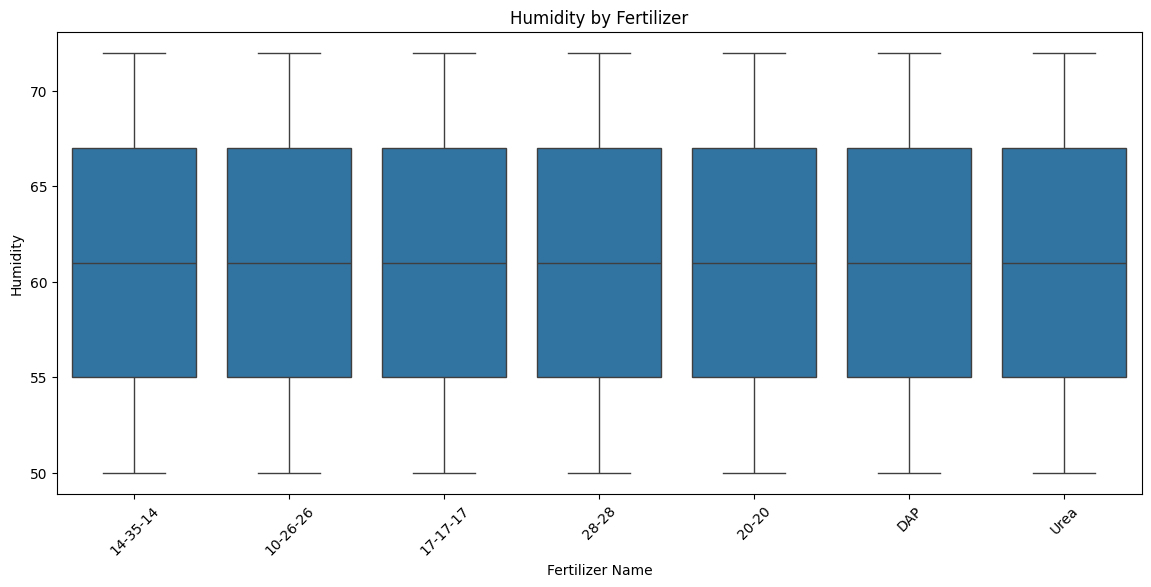

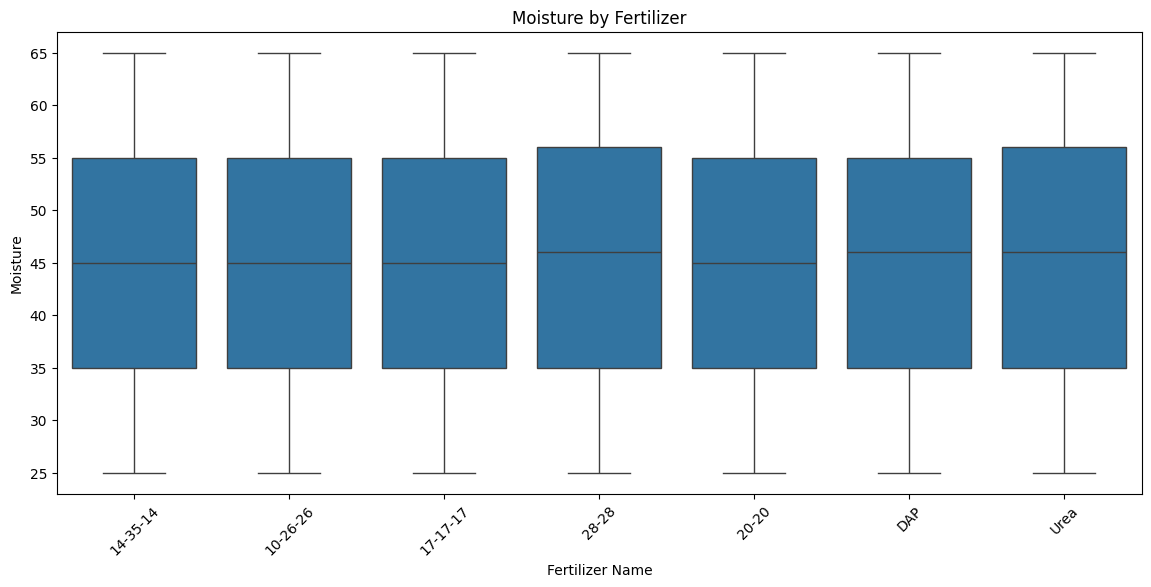

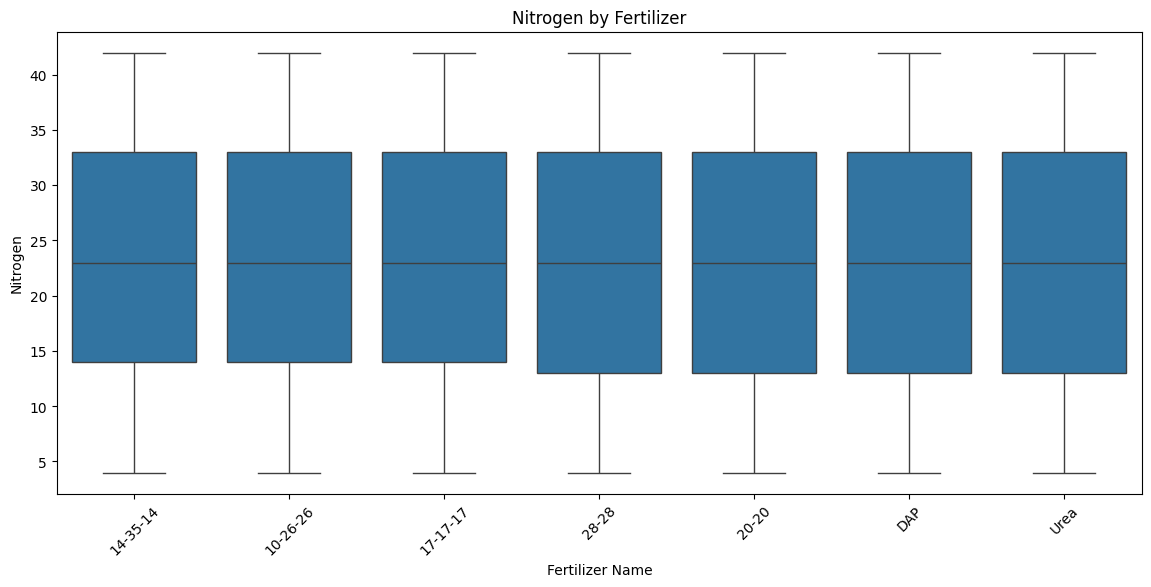

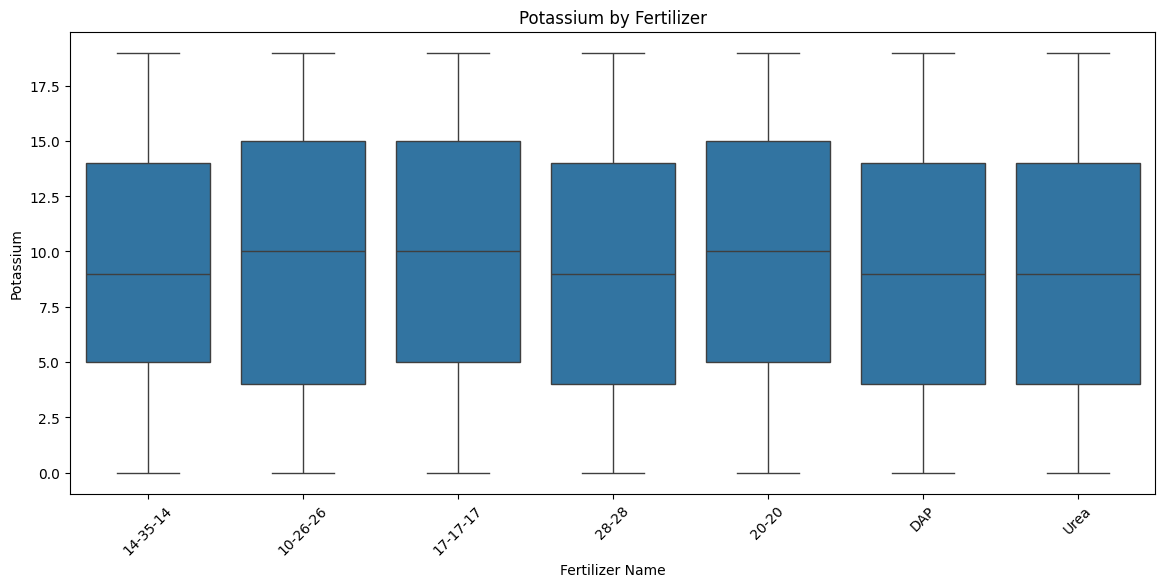

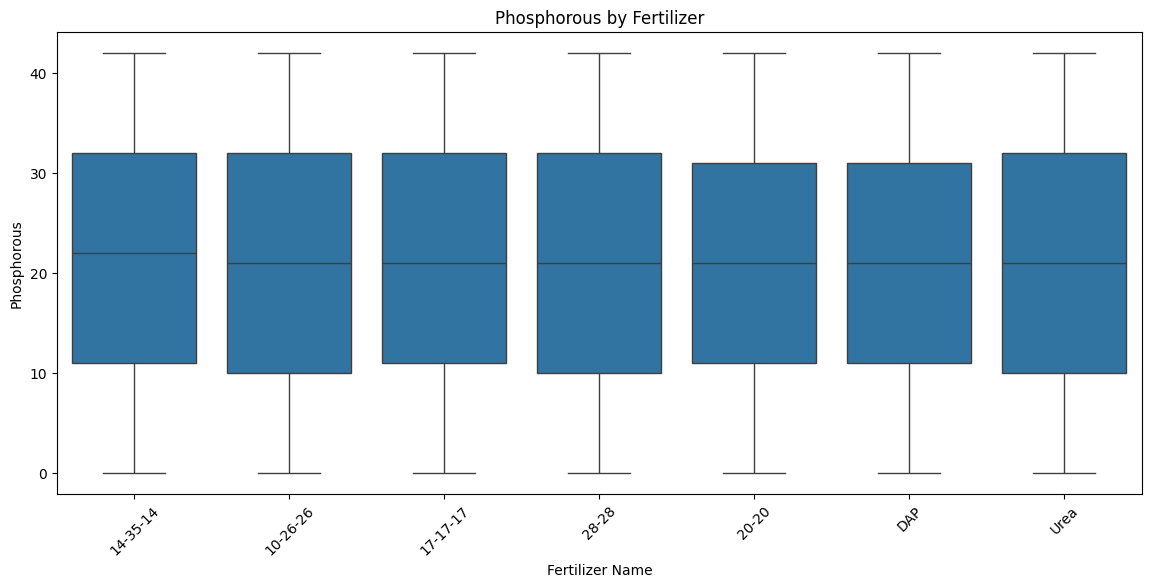

In [24]:
num_cols = numerical_df.columns.tolist()
for col in num_cols:
    plt.figure(figsize=(14,6))
    sns.boxplot(
        data=train,
        x=target_col, y=col,
        order=vc.index
    )
    plt.title(f"{col} by Fertilizer")
    plt.xticks(rotation=45)
    plt.show()

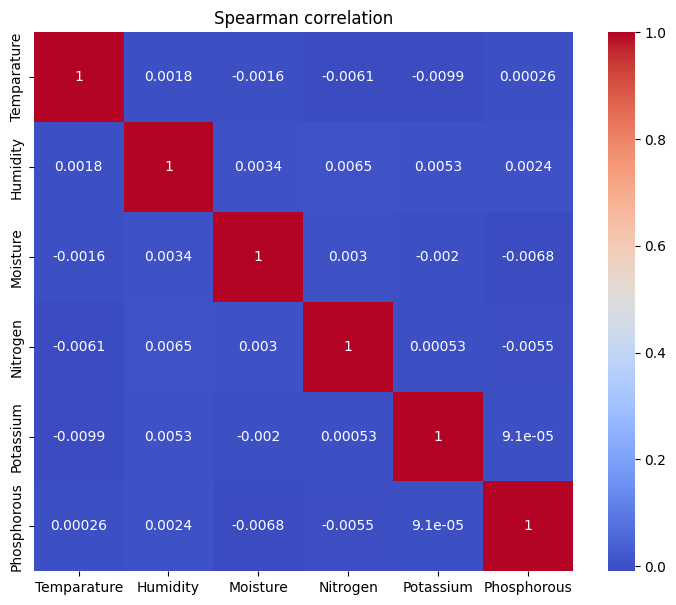

In [25]:
corr = train[num_cols].corr(method="spearman")
plt.figure(figsize=(9,7))
sns.heatmap(corr, cmap="coolwarm", annot=True, square=True)
plt.title("Spearman correlation")
plt.show()

Finding	Impact on Modelling

No missing values	Simple pipeline (no imputer).

Mild class imbalance	Standard multi-class log-loss is acceptable.

Nutrient medians differ by fertilizer	These features are predictive; try ratio features (N\:P\:K).

Soil × Crop interaction is strong	Include combined categorical or target-encoded pair.

Low feature correlations	Tree ensembles can exploit each variable independently.

Overlap in 2-D space	Non-linear learners or stacked models preferred over pure linear.

One-hot encode Soil Type, Crop Type, plus a composite (Soil|Crop) token.

Train a LightGBM/XGBoost multi-class model (depth ≤ 6, cat-loss handling).

Ensemble with a simple MLP that ingests scaled numerics and embedded categoricals.

Evaluate with stratified k-fold, optimise macro-F1 or log-loss.

In [29]:
train.duplicated().sum()

0